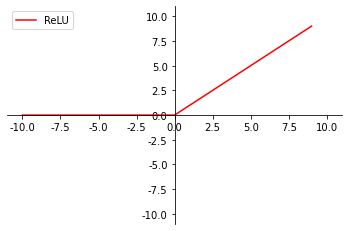

In [10]:
# 激活函数

import math
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False


# 激活函数
fig =  plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.arange(-10,10)
y = np.where(x<0,0,x)
plt.xlim(-11,11)
plt.ylim(-11,11)

ax = plt.gca() # 获得当前axis坐标轴对象
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线

ax.xaxis.set_ticks_position('bottom') # 指定下边的边作为x轴
ax.yaxis.set_ticks_position('left') # 指定左边的边为y轴

ax.spines['bottom'].set_position(('data',0)) # 指定data 设置的bottom（也就是指定的x轴）绑定到y轴的0这个点上
ax.spines['left'].set_position(('data',0))  # 指定y轴绑定到x轴的0这个点上

plt.plot(x,y,label = 'ReLU',linestyle='-',color='r')
plt.legend(['ReLU'])

# 常见的激活函数有sigmoid, relu, tanh
# 其他激活函数参考torch.nn下激活函数

第0轮迭代下训练损失0.5599408745765686和测试损失0.414137065410614
第3000轮迭代下训练损失0.13904328644275665和测试损失0.07822047173976898
第6000轮迭代下训练损失0.13872192800045013和测试损失0.08175544440746307
第9000轮迭代下训练损失0.13868391513824463和测试损失0.07940378785133362
第12000轮迭代下训练损失0.13867297768592834和测试损失0.07821198552846909
第15000轮迭代下训练损失0.13866743445396423和测试损失0.07817332446575165
第18000轮迭代下训练损失0.13866399228572845和测试损失0.07910806685686111
第21000轮迭代下训练损失0.1386629343032837和测试损失0.07964063435792923
第24000轮迭代下训练损失0.13866226375102997和测试损失0.08001719415187836
第27000轮迭代下训练损失0.13866177201271057和测试损失0.08027054369449615


/Users/fubin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


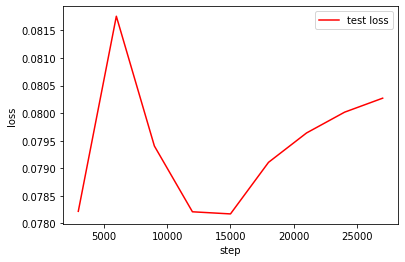

In [46]:
# 拟合过程注意偏差和方差的区别：偏差体现过大则欠拟合（均值，拟合能力差），方差过大则过拟合（复制，拟合噪音，泛化能力下降）。
# 训练过程中：偏差越来越小，方差越来越大，泛化误差先下降后增长。

# 神经网络极易过拟合，以下以拟合一个简单函数为例说明

import torch
sample_num = 100
feature_num = 3
# X:
X = torch.rand(sample_num, feature_num)
X = X/X.max()
# noise
noise = torch.rand(sample_num)
noise = 0.1 * noise/noise.max()
# Y:
Y = X[:,0]**2 + X[:,1]**2 + X[:,2]**2 + noise

# train, test
train_X, test_X = X[:-int(sample_num/5), :], X[-int(sample_num/5):, :]
train_Y, test_Y = Y[:-int(sample_num/5)], Y[-int(sample_num/5):]

# 复杂网络导致过拟合
hidden_nums = [feature_num, 6, 5, 6, 2, 1]
net_layers = []
for idx, hidden_num in enumerate(hidden_nums[:-1]):
    net_layers.append(torch.nn.Linear(hidden_num, hidden_nums[idx+1]))
    net_layers.append(torch.nn.Sigmoid())
net = torch.nn.Sequential(*net_layers)

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

train_losses, test_losses = [], []
steps = []
for step in range(30000):
    optimizer.zero_grad()
    train_output = net(train_X).squeeze(-1)
    train_loss = criterion(train_output, train_Y)
    
    test_output = net(test_X).squeeze(-1)
    test_loss = criterion(test_output, test_Y)
    
    if step%3000==0:
        steps.append(step)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
#         print(train_losses)
        print('第{}轮迭代下训练损失{}和测试损失{}'.format(step, train_loss, test_loss))
    
    train_loss.backward()
    optimizer.step()

# 画图
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
# plt.plot(steps[-5:], train_losses[-5:], label='train loss', color='k')
plt.plot(steps[1:], test_losses[1:], label='test loss', color='r')
plt.xlabel('step')
plt.ylabel('loss')
plt.legend()
plt.show()